In [152]:
import tensorflow as tf 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib import layers

class traffic_model():
    def __init__(self,convolutions_list=[(3,7,2,2),(3,5,2,2),(3,3,2,1)]): #filter_size,num_outputs,stride,repeats
        self.sess = tf.Session()
        n_input = 227*227
        self.n_output = 4
        self.input_shape = [227,227,3]
        self.state = tf.placeholder(tf.float32,[None]+self.input_shape,name="state")
        self.Y = tf.placeholder(tf.float32,[None,4],name="Y")
        print self.state.get_shape()
        with tf.variable_scope('image-sequence-regression'):
            with tf.variable_scope('cnn'):
                in_tensor = tf.reshape(self.state, [-1] + self.input_shape)
                for filter_size, num_outputs, stride, repeats in convolutions_list:
                    for _ in range(repeats):
                        in_tensor = tf.contrib.layers.convolution2d(in_tensor,
                        num_outputs=num_outputs,
                        kernel_size=filter_size,
                        stride=stride,
                        padding='VALID',
                        rate=1,
                        activation_fn=tf.nn.relu,
                        trainable=True)
                        print in_tensor.get_shape()
                    # TODO: parameterized pooling layers
                    pool_out = tf.contrib.layers.max_pool2d(in_tensor,
                        kernel_size=[2,2],
                        stride=[1,1],
                        padding='VALID')
                    in_tensor = pool_out

                out_dim = np.product(in_tensor.get_shape().as_list()[1:])
                cnn_out = tf.reshape(in_tensor, [-1, out_dim])
                
                with tf.variable_scope('fully-connected'):
                    y_out = layers.stack(cnn_out, layers.fully_connected, [10, 20, 4])
                    #defining the cost of 
                    self.cost = tf.reduce_sum(tf.pow(y_out-self.Y, 2))
                    self.optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(self.cost)
            init = tf.initialize_all_variables()
    
    def train(self,x,y,n_iter,n_batchsize):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            costs = []
            avg_cost = []
            for i in range(n_iter):
                final_y = []
                j = 0
                for (start, end) in zip(range(0,len(x),n_batchsize), range(n_batchsize,len(x),n_batchsize)):
                    j = j+1
                    self.sess.run(self.optimizer, feed_dict={self.state: x[start:end], self.Y: y[start:end]})
                    c = self.sess.run(self.cost, feed_dict={self.state: x[start:end], self.Y: y[start:end]})
                    #yf = self.sess.run(self.ypred, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    costs.append(np.mean(c))
                    #final_y.append(yf)
                    
                avg_cost.append(np.mean(costs))
                #if(i %100 == 0):
                print i," iteration : Mean cost",np.mean(costs)
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(1,figsize=(20,10))
            axarr.plot(avg_cost)
            axarr.set_title('Cost and Prediction Plot')
            axarr.set_xlabel("iteration")


In [153]:
f = open("/home/girish/Projects/data/datapath.txt")


In [154]:
data = f.readlines()

In [155]:
import random
data_shuffled = random.shuffle(data)



In [156]:
import scipy.misc as msc
l = []
y = []
header = "/home/girish/Projects/"
for each in data:
    sp = each.split(" ")
    img_str = header+sp[0]
    d = msc.imread(img_str)
    l.append(d)
    y.append( [int(x.strip("\n")) for x in sp[1:]])


In [161]:
tf.reset_default_graph()
tr = traffic_model()

(?, 227, 227, 3)
(?, 113, 113, 7)
(?, 56, 56, 7)
(?, 27, 27, 5)
(?, 13, 13, 5)
(?, 5, 5, 3)


0  iteration : Mean cost 15390.0
1  iteration : Mean cost 10380.2
2  iteration : Mean cost 10233.1
3  iteration : Mean cost 10138.7
4  iteration : Mean cost 10075.9
5  iteration : Mean cost 10029.4
6  iteration : Mean cost 9990.05
7  iteration : Mean cost 9957.18
8  iteration : Mean cost 9933.63
9  iteration : Mean cost 9910.4
10  iteration : Mean cost 9892.61
11  iteration : Mean cost 9878.76
12  iteration : Mean cost 9866.99
13  iteration : Mean cost 9853.26
14  iteration : Mean cost 9850.98
15  iteration : Mean cost 9838.61
16  iteration : Mean cost 9833.79
17  iteration : Mean cost 9828.17
18  iteration : Mean cost 9821.02
19  iteration : Mean cost 9815.92
20  iteration : Mean cost 9808.18
21  iteration : Mean cost 9803.69
22  iteration : Mean cost 9796.54
23  iteration : Mean cost 9792.58
24  iteration : Mean cost 9791.0
25  iteration : Mean cost 9786.83
26  iteration : Mean cost 9782.53
27  iteration : Mean cost 9784.34
28  iteration : Mean cost 9778.35
29  iteration : Mean cost 

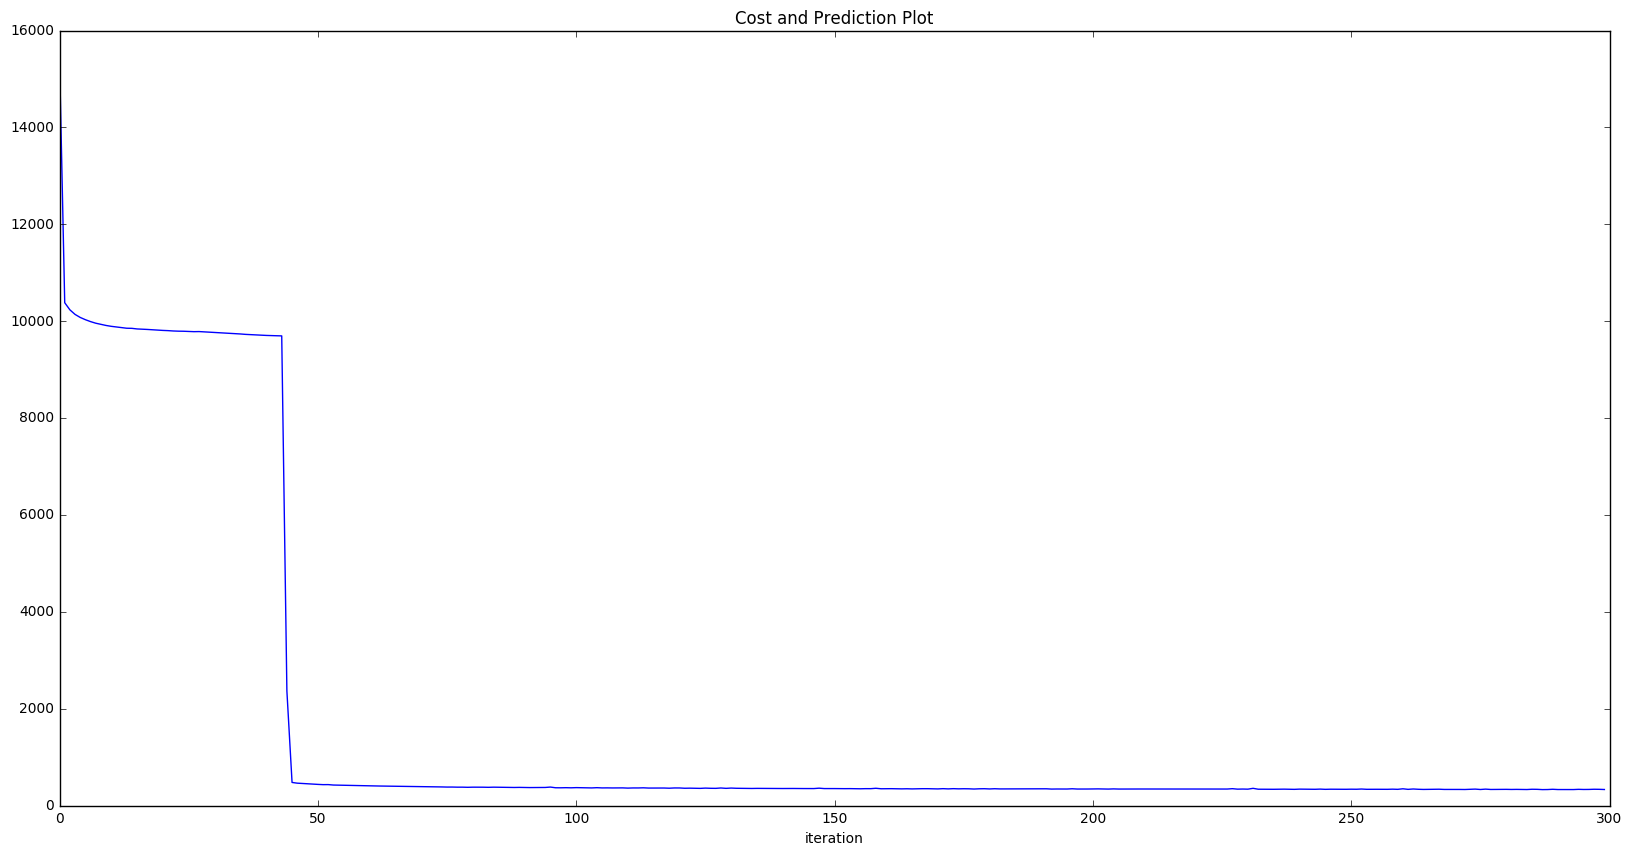

In [162]:
tr.train(l,y,300,10)
    

In [163]:
tf.reset_default_graph()
tr = traffic_model()
tr.train(l,y,100,50)

(?, 227, 227, 3)
(?, 113, 113, 7)
(?, 56, 56, 7)
(?, 27, 27, 5)
(?, 13, 13, 5)
(?, 5, 5, 3)


KeyboardInterrupt: 